In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [8]:
data = pd.read_csv('currency_prediction.csv')

In [ ]:
data.head()

In [ ]:
data2 = pd.DataFrame({'Date' : [1997, 1973, 1974, 1975, 1976], 'Naira_per_Usd' : [0.658, 0.658, 0.630, 0.616, 0.620 ]})

In [ ]:
data2.info()

In [19]:
data = data.drop([45], axis = 0)

In [20]:
data.tail()

,Date,Naira_per_Usd
44,2016,390.0
46,2018,360.0
47,2019,305.0
48,2020,361.0
49,2021,413.0


In [104]:
data.shape

(49, 2)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 49
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           49 non-null     int64  
 1   Naira_per_Usd  49 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [106]:
data.isnull().sum()

Date             0
Naira_per_Usd    0
dtype: int64

In [75]:
Ploting the  Chart to view the linearity between the two variable

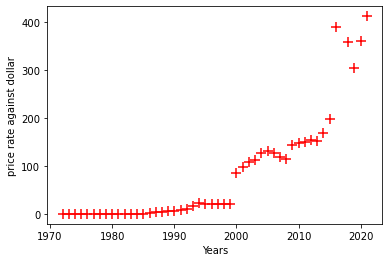

In [21]:
plt.scatter(data.Date, data.Naira_per_Usd, marker = '+', color = 'red', s =90 )
plt.xlabel('Years')
plt.ylabel('price rate against dollar')
plt.show()

# Linear Regression

In [22]:
x = data['Date']
y = data['Naira_per_Usd']

In [201]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 2)

In [202]:
train_x = pd.DataFrame(x_train)

In [203]:
train_x.head()

,Date
2,1974
9,1981
17,1989
30,2002
25,1997


In [204]:
train_y = pd.DataFrame(y_train)
train_y.head()

,Naira_per_Usd
2,0.63
9,0.61
17,7.30
30,109.00
25,21.89


In [205]:
Reg = linear_model.LinearRegression()

In [206]:
model = Reg.fit(train_x[['Date']], train_y.Naira_per_Usd)
model

LinearRegression()

In [207]:
model.intercept_

-12449.762040055784

In [208]:
model.coef_

array([6.27754422])

In [210]:
test_x = pd.DataFrame(x_test)
test_x.head()

,Date
23,1995
12,1984
42,2014
16,1988
35,2007


In [211]:
p = model.predict(test_x[['Date']])
p

array([ 73.93867713,   4.88569072, 193.21201729,  29.9958676 ,
       149.26920776, 205.76710573, 230.87728261,  11.16323494,
        17.44077916, -70.44483991])

In [212]:
error_score = metrics.r2_score(y_test, p)

In [213]:
error_score

0.711195769240009

In [214]:
model.predict([[2022]])

array([243.43237105])

In [215]:
y_test.shape

(10,)

In [216]:
test_y.shape

NameError: name 'test_y' is not defined

In [217]:
model.score(train_x[['Date']], train_y.Naira_per_Usd)

0.7330195142491517

In [218]:
model.predict([[1981]])

array([-13.94694194])

In [87]:
x_test

23    1995
12    1984
42    2014
16    1988
35    2007
44    2016
48    2020
13    1985
14    1986
0     1972
2     1974
9     1981
17    1989
30    2002
25    1997
Name: Date, dtype: int64

In [ ]:
test_x = pd.DataFrame(x_test)
test_x.head()

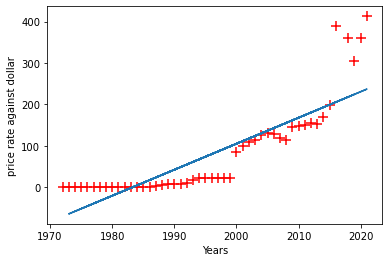

In [220]:
plt.scatter(data.Date, data.Naira_per_Usd, marker = '+', color = 'red', s =90 )
plt.xlabel('Years')
plt.ylabel('price rate against dollar')
plt.plot(train_x.Date, model.predict(train_x[['Date']]))
plt.show()